In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.show()

In [2]:
suicide_df = pd.read_csv(r"C:\Users\HP\Videos\Data Science\master.csv")

In [3]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
type(suicide_df)

pandas.core.frame.DataFrame

In [4]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


dropping the HDI for year column since the null values are very many

In [7]:
suicide_df.drop(['HDI for year'],inplace=True,axis=1)

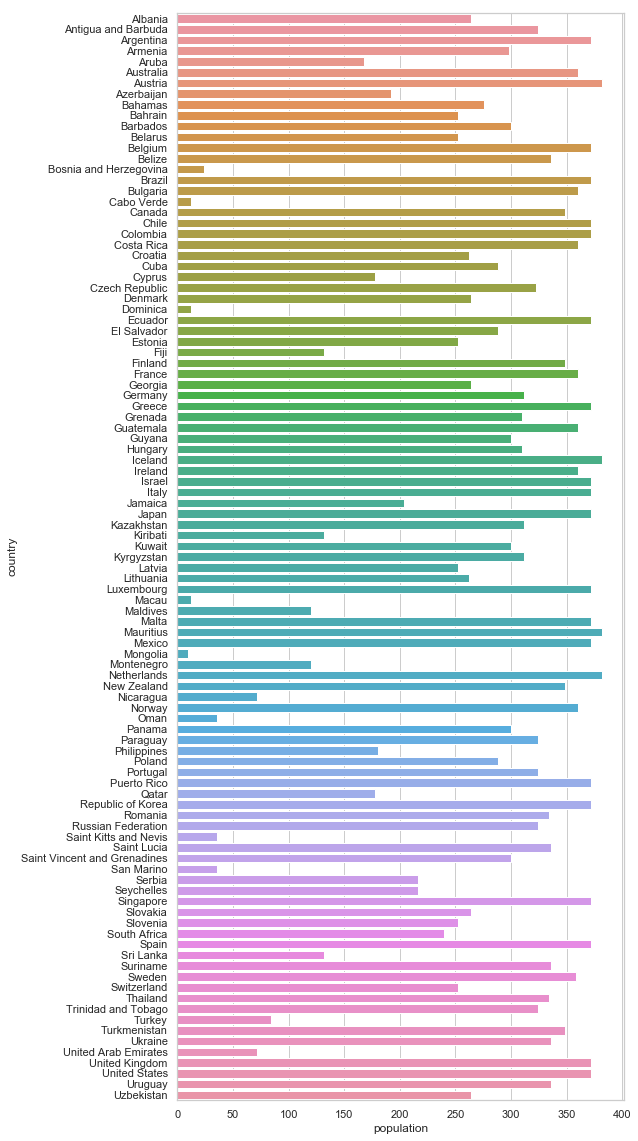

In [8]:
#country vs population

sns.set(style='whitegrid')
f,ax = plt.subplots(figsize=(8,20))
ax = sns.barplot(suicide_df.population.groupby(suicide_df.country).count(),suicide_df.population.groupby(suicide_df.country).
                count().index)
plt.show()

In [9]:
#sns.countplot(x='country',data=suicide_df,hue='suicides_no')

Frequency of different generations

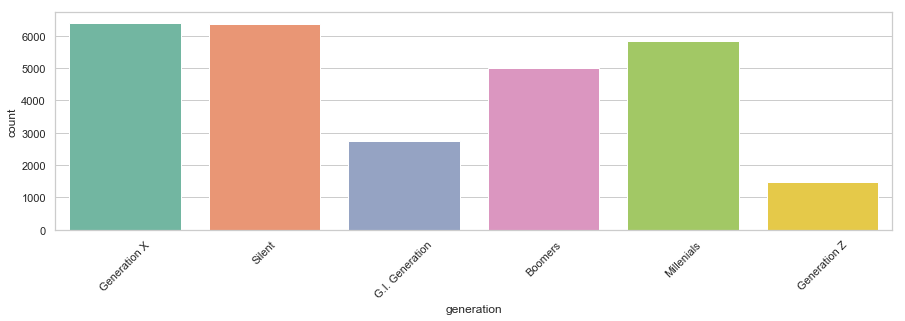

In [10]:
f,ax = plt.subplots(1,1, figsize=(15,4))

ax = sns.countplot(suicide_df.generation,palette='Set2')

plt.xticks(rotation = 45)
plt.show()

In [11]:
suicides_sex_age = suicide_df[['sex','age','suicides_no']].groupby(['sex','age']).mean()

In [12]:
suicides_sex_age


suicides_no
sex    age                     
female 15-24 years    75.586816
       25-34 years    89.971133
       35-54 years   218.109866
       5-14 years      7.373970
       55-74 years   185.280483
       75+ years      95.641534
male   15-24 years   272.772512
       25-34 years   394.264972
       35-54 years   838.392072
       5-14 years     15.300217
       55-74 years   529.257648
       75+ years     185.753555

In [13]:
sns.countplot

<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [14]:
suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


The above description shows that the minimum and maximum number of suicide cases occured in year 1985 and 2016 respectively

Let's us now plot the number of suicide cases from 1985 to 2016


In [15]:
suicide_per_year = suicide_df.groupby('year').sum();

print(suicide_per_year)

      suicides_no  population  suicides/100k pop  gdp_per_capita ($)
year                                                                
1985       116063  1008600086            6811.89             3508548
1986       120670  1029909613            6579.84             4104636
1987       126842  1095029726            7545.45             5645760
1988       121026  1054094424            7473.13             5870508
1989       160244  1225514347            8036.54             6068424
1990       193361  1466620100            9878.75             7531260
1991       198020  1489988384           10321.06             7782096
1992       211473  1569539447           10528.88             8195232
1993       221565  1530416654           10790.29             8231796
1994       232063  1548749372           11483.79             9438756
1995       243544  1591559103           14660.26            11858508
1996       246725  1662267662           14142.21            11600736
1997       240745  1702991519     

Let's now show the plot

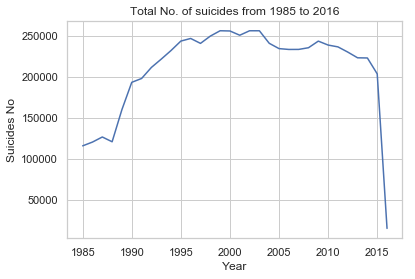

In [16]:
suicide_per_year['suicides_no'].plot()

plt.title('Total No. of suicides from 1985 to 2016')

plt.ylabel('Suicides No')

plt.xlabel('Year')
           
plt.show()



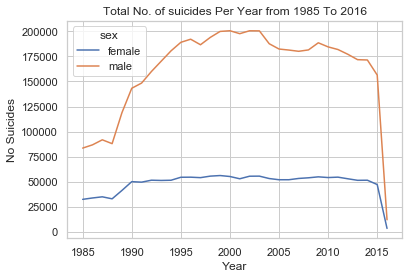

In [17]:
suicide_df.pivot_table('suicides_no', index='year',columns='sex',aggfunc='sum').plot()

plt.title('Total No. of suicides Per Year from 1985 To 2016')

plt.ylabel('No Suicides')

plt.xlabel('Year')

plt.show()

From the plot above it shows that there are more male cases of suicides than female

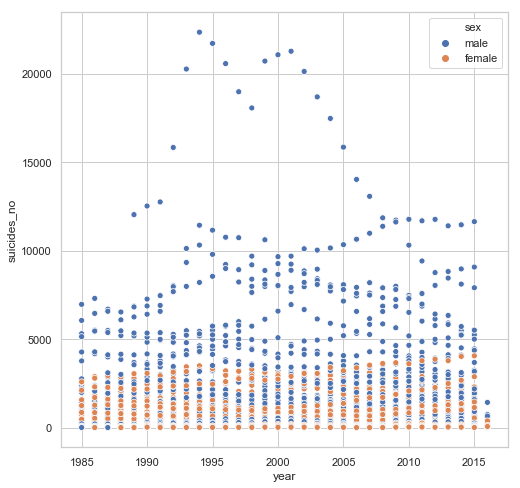

In [18]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='year', y = 'suicides_no',data=suicide_df, hue='sex')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


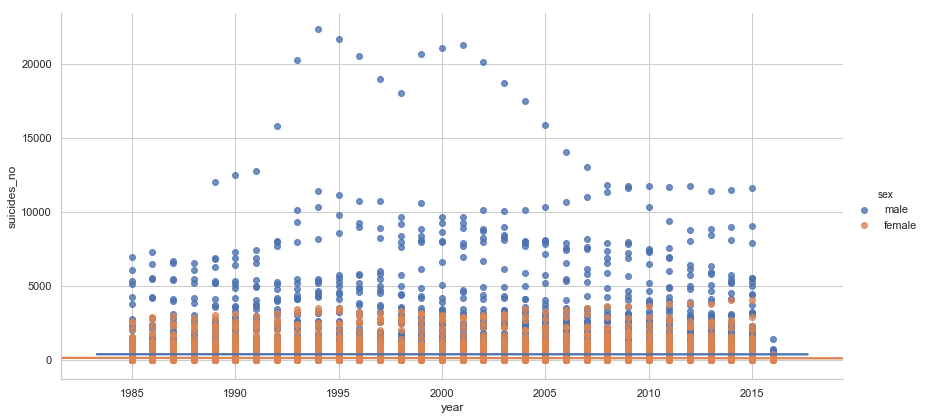

In [19]:
sns.lmplot(x='year', y='suicides_no', data=suicide_df,hue='sex',aspect=2, height=6)

This is a better plot than the scatterplot

In [20]:
gen_sui = suicide_df.pivot_table('suicides_no', index='generation', aggfunc='sum')

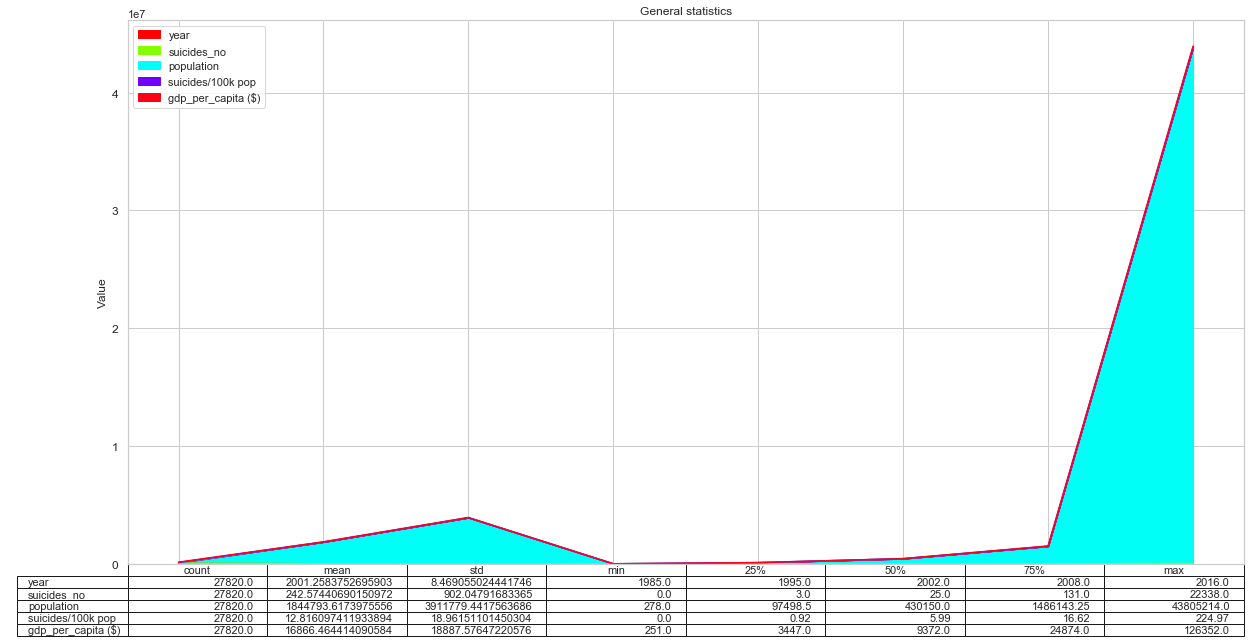

In [21]:
suicide_df.describe().plot(kind = 'Area',fontsize=12,figsize=(20,10),table=True, colormap='hsv')



plt.ylabel('Value')

plt.title('General statistics')


plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

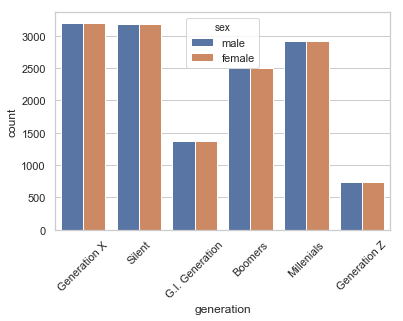

In [22]:
sns.countplot(x= 'generation', hue = 'sex', data=suicide_df)

plt.xticks(rotation = 45)

Now, let's look at the number suicides cases per age group

In [23]:
sui_per_age = suicide_df.pivot_table('suicides_no', index=['age','country'], aggfunc='sum')

In [24]:
sui_per_age.head(20)

suicides_no
age         country                            
15-24 years Albania                         546
            Antigua and Barbuda               0
            Argentina                     17655
            Armenia                         175
            Aruba                             7
            Australia                     11086
            Austria                        4367
            Azerbaijan                      299
            Bahamas                          17
            Bahrain                          54
            Barbados                         23
            Belarus                        5490
            Belgium                        4475
            Belize                           98
            Bosnia and Herzegovina            8
            Brazil                        44597
            Bulgaria                       2543
            Cabo Verde                        6
            Canada                        15909
            Chile                          7845

In [25]:
x = sui_per_age.index.values



In [26]:
 y = sui_per_age.values
    


In [27]:
sui_age = suicide_df.pivot_table('suicides_no', index='age', aggfunc='sum')



In [28]:
sui_age

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


In [29]:
x = sui_age.index.values

y = sui_age.values


y = y.reshape(6,)

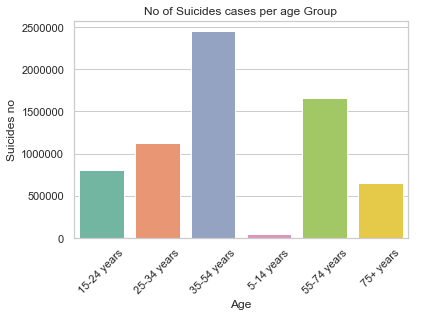

In [30]:
sns.barplot( x = x,  y = y, palette='Set2')

plt.xlabel('Age')

plt.ylabel('Suicides no')


plt.title('No of Suicides cases per age Group')

plt.xticks(rotation = 45)




plt.show()

Number of suicides cases for different age group

In [31]:
sui_age1 = suicide_df.pivot_table('suicides_no', index=['age','sex'], aggfunc='sum')


sui_age1

suicides_no
age         sex                
15-24 years female       175437
            male         633105
25-34 years female       208823
            male         915089
35-54 years female       506233
            male        1945908
5-14 years  female        16997
            male          35267
55-74 years female       430036
            male        1228407
75+ years   female       221984
            male         431134

This gives a better idea of the data vis-a-vis the male and female suicide no


let now try to visualise this data

In [32]:
x = sui_age1.index.values

y = sui_age1.values


y = y.reshape(12,)

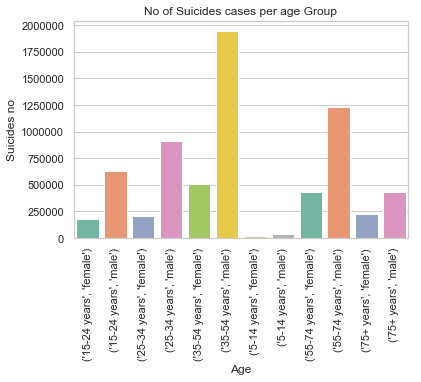

In [33]:
sns.barplot( x = x,  y = y, palette='Set2')

plt.xlabel('Age')

plt.ylabel('Suicides no')


plt.title('No of Suicides cases per age Group')

plt.xticks(rotation = 90)




plt.show()

In [34]:
suicide_per_year

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,,,,
1985,116063,1008600086,6811.89,3508548
1986,120670,1029909613,6579.84,4104636
1987,126842,1095029726,7545.45,5645760
1988,121026,1054094424,7473.13,5870508
1989,160244,1225514347,8036.54,6068424
1990,193361,1466620100,9878.75,7531260
1991,198020,1489988384,10321.06,7782096
1992,211473,1569539447,10528.88,8195232
1993,221565,1530416654,10790.29,8231796


In [35]:
suicide_per_year.rename(index=str, columns={'gdp_per_capita ($)':'gdp_per_capital'}, inplace=True)

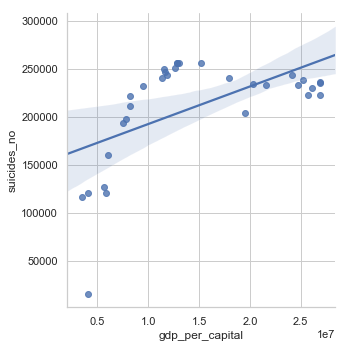

In [36]:
sns.lmplot(x = 'gdp_per_capital', y = 'suicides_no', data=suicide_per_year)

This shows that there is a linear relationship between gdp_per_capital and suicide No

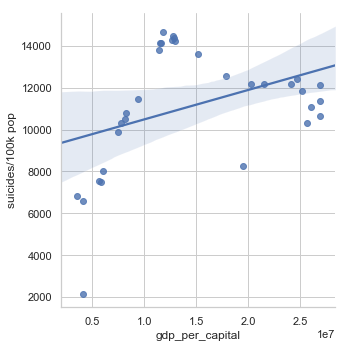

In [37]:
sns.lmplot(x = 'gdp_per_capital', y = 'suicides/100k pop', data=suicide_per_year)